# Lunar Lander V-3  
## Actor-Critic Algorithm  

### CSCI4050 Final Project  
### Project Code 22

**Neel Shah** - 100789924  
**Dev Thaker**  -100808882

github link: https://github.com/nshah271/LunarLanderV-3_RL_Solution.git 


In [9]:
# Import the Gymnasium library for creating and interacting with environments
import gymnasium as gym

# Import the A2C (Advantage Actor-Critic) algorithm from Stable-Baselines3
from stable_baselines3 import A2C

# Utility for creating vectorized environments for parallel training
from stable_baselines3.common.env_util import make_vec_env

# Base class for creating custom callbacks and EvalCallback for model evaluation
from stable_baselines3.common.callbacks import BaseCallback, EvalCallback

# Import logger utilities from Stable-Baselines3 for logging training metrics
from stable_baselines3.common import logger
from stable_baselines3.common.logger import configure

# Suppress warnings to reduce console clutter during execution
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt



In [6]:
# Create the Lunar Lander environment with human-rendering enabled
env = gym.make("LunarLander-v3", render_mode="human")

# Create a vectorized version of the environment for parallel processing
# In this case, only one environment (n_envs=1) is being created
vec_env = make_vec_env(lambda: env, n_envs=1)


In [8]:
# Create an evaluation callback to monitor the model's performance
eval_callback = EvalCallback(
    env,  # The environment to evaluate the model on
    best_model_save_path='./logs/',  # Path to save the best model
    log_path='./logs/',  # Path to save evaluation logs
    eval_freq=10000,  # Frequency of evaluation (in timesteps)
    deterministic=True,  # Use deterministic actions during evaluation
    render=False  # Disable rendering during evaluation
)

# Configure the logger to output logs in both stdout (console) and JSON formats
# Logs will be saved in the 'logs' directory
model_logger = configure('logs', ["stdout", "json"])

Logging to logs


In [9]:
# Initialize the A2C (Advantage Actor-Critic) model with an MLP policy
# - "MlpPolicy": Multilayer Perceptron (fully connected neural network) policy
# - vec_env: Vectorized environment for training
# - verbose=1: Enable detailed logging during training
# - learning_rate=0.001: Learning rate for the optimizer
# - gamma=0.99: Discount factor for future rewards
model = A2C("MlpPolicy", vec_env, verbose=1, learning_rate=0.001, gamma=0.99)

# Set the logger for the model to log training metrics in both stdout and JSON format
model.set_logger(model_logger)

# Train the model for a total of 100,000 timesteps
# - progress_bar=True: Display a progress bar during training
# - callback=eval_callback: Use the evaluation callback for periodic evaluation and saving the best model
model.learn(total_timesteps=100000, progress_bar=True, callback=eval_callback)


Using cuda device


Output()

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 208      |
|    ep_rew_mean        | -320     |
| time/                 |          |
|    fps                | 137      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.37    |
|    explained_variance | 0.0159   |
|    learning_rate      | 0.001    |
|    n_updates          | 99       |
|    policy_loss        | -5.08    |
|    value_loss         | 18       |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 189      |
|    ep_rew_mean        | -323     |
| time/                 |          |
|    fps                | 183      |
|    iterations         | 200      |
|    time_elapsed       | 5        |
|    total_timesteps    | 1000     |
| train/                |          |
|

Eval num_timesteps=10000, episode_reward=28.64 +/- 110.11

Episode length: 150.60 +/- 96.26

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 151      |
|    mean_reward        | 28.6     |
| time/                 |          |
|    total_timesteps    | 10000    |
| train/                |          |
|    entropy_loss       | -0.754   |
|    explained_variance | -0.117   |
|    learning_rate      | 0.001    |
|    n_updates          | 1999     |
|    policy_loss        | 13.7     |
|    value_loss         | 379      |
------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 180      |
|    ep_rew_mean     | -291     |
| time/              |          |
|    fps             | 296      |
|    iterations      | 2000     |
|    time_elapsed    | 33       |
|    total_timesteps | 10000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 176      |
|    ep_rew_mean        | -272     |
| time/                 |          |
|    fps                | 299      |
|    iterations         | 2100     |
|    time_elapsed       | 35       |
|    total_timesteps    | 10500    |
| train/                |          |
|    entropy_loss       | -0.372   |
|    explained_variance | 0.304    |
|    learning_rate      | 0.001    |
|    n_updates          | 2099     |
|    policy_loss        | -3.56    |
|    value_loss         | 84.9     |
------------------------------------
-------------------------------

Eval num_timesteps=20000, episode_reward=102.97 +/- 115.32

Episode length: 394.80 +/- 39.22

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 395      |
|    mean_reward        | 103      |
| time/                 |          |
|    total_timesteps    | 20000    |
| train/                |          |
|    entropy_loss       | -0.567   |
|    explained_variance | 0.624    |
|    learning_rate      | 0.001    |
|    n_updates          | 3999     |
|    policy_loss        | 0.23     |
|    value_loss         | 0.744    |
------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 178      |
|    ep_rew_mean     | -121     |
| time/              |          |
|    fps             | 307      |
|    iterations      | 4000     |
|    time_elapsed    | 65       |
|    total_timesteps | 20000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 182      |
|    ep_rew_mean        | -113     |
| time/                 |          |
|    fps                | 308      |
|    iterations         | 4100     |
|    time_elapsed       | 66       |
|    total_timesteps    | 20500    |
| train/                |          |
|    entropy_loss       | -0.517   |
|    explained_variance | 0.901    |
|    learning_rate      | 0.001    |
|    n_updates          | 4099     |
|    policy_loss        | 2.21     |
|    value_loss         | 12.8     |
------------------------------------
-------------------------------

Eval num_timesteps=30000, episode_reward=-38.12 +/- 22.74

Episode length: 187.20 +/- 31.49

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 187      |
|    mean_reward        | -38.1    |
| time/                 |          |
|    total_timesteps    | 30000    |
| train/                |          |
|    entropy_loss       | -1.1     |
|    explained_variance | 0.901    |
|    learning_rate      | 0.001    |
|    n_updates          | 5999     |
|    policy_loss        | -0.661   |
|    value_loss         | 0.537    |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 190      |
|    ep_rew_mean     | -17.2    |
| time/              |          |
|    fps             | 302      |
|    iterations      | 6000     |
|    time_elapsed    | 99       |
|    total_timesteps | 30000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 193      |
|    ep_rew_mean        | -15.9

Eval num_timesteps=40000, episode_reward=-109.46 +/- 43.27

Episode length: 987.40 +/- 25.20

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 987      |
|    mean_reward        | -109     |
| time/                 |          |
|    total_timesteps    | 40000    |
| train/                |          |
|    entropy_loss       | -0.623   |
|    explained_variance | 0.552    |
|    learning_rate      | 0.001    |
|    n_updates          | 7999     |
|    policy_loss        | -3.53    |
|    value_loss         | 5.73     |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 222      |
|    ep_rew_mean     | -19.6    |
| time/              |          |
|    fps             | 299      |
|    iterations      | 8000     |
|    time_elapsed    | 133      |
|    total_timesteps | 40000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 222      |
|    ep_rew_mean        | -19.6

Eval num_timesteps=50000, episode_reward=74.62 +/- 84.30

Episode length: 212.80 +/- 85.04

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 213      |
|    mean_reward        | 74.6     |
| time/                 |          |
|    total_timesteps    | 50000    |
| train/                |          |
|    entropy_loss       | -0.592   |
|    explained_variance | 0.815    |
|    learning_rate      | 0.001    |
|    n_updates          | 9999     |
|    policy_loss        | -0.691   |
|    value_loss         | 4.57     |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 246      |
|    ep_rew_mean     | -37.8    |
| time/              |          |
|    fps             | 304      |
|    iterations      | 10000    |
|    time_elapsed    | 164      |
|    total_timesteps | 50000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 246      |
|    ep_rew_mean        | -36.6

Eval num_timesteps=60000, episode_reward=-79.37 +/- 56.56

Episode length: 73.20 +/- 6.31

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 73.2     |
|    mean_reward        | -79.4    |
| time/                 |          |
|    total_timesteps    | 60000    |
| train/                |          |
|    entropy_loss       | -0.29    |
|    explained_variance | 0.996    |
|    learning_rate      | 0.001    |
|    n_updates          | 11999    |
|    policy_loss        | -0.0538  |
|    value_loss         | 0.344    |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 111      |
|    ep_rew_mean     | -25.3    |
| time/              |          |
|    fps             | 307      |
|    iterations      | 12000    |
|    time_elapsed    | 195      |
|    total_timesteps | 60000    |
---------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 106       |
|    ep_rew_mean        | -2

Eval num_timesteps=70000, episode_reward=-18.75 +/- 12.44

Episode length: 107.20 +/- 11.94

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 107      |
|    mean_reward        | -18.8    |
| time/                 |          |
|    total_timesteps    | 70000    |
| train/                |          |
|    entropy_loss       | -1.15    |
|    explained_variance | 0.888    |
|    learning_rate      | 0.001    |
|    n_updates          | 13999    |
|    policy_loss        | -2.25    |
|    value_loss         | 5.45     |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91       |
|    ep_rew_mean     | -42.2    |
| time/              |          |
|    fps             | 311      |
|    iterations      | 14000    |
|    time_elapsed    | 225      |
|    total_timesteps | 70000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 93       |
|    ep_rew_mean        | -39.1

Eval num_timesteps=80000, episode_reward=-49.79 +/- 29.57

Episode length: 258.20 +/- 19.49

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 258      |
|    mean_reward        | -49.8    |
| time/                 |          |
|    total_timesteps    | 80000    |
| train/                |          |
|    entropy_loss       | -0.855   |
|    explained_variance | 0.926    |
|    learning_rate      | 0.001    |
|    n_updates          | 15999    |
|    policy_loss        | -0.565   |
|    value_loss         | 0.469    |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 124      |
|    ep_rew_mean     | -23.7    |
| time/              |          |
|    fps             | 312      |
|    iterations      | 16000    |
|    time_elapsed    | 255      |
|    total_timesteps | 80000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 129      |
|    ep_rew_mean        | -20.9

Eval num_timesteps=90000, episode_reward=-492.47 +/- 117.02

Episode length: 707.20 +/- 156.42

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 707      |
|    mean_reward        | -492     |
| time/                 |          |
|    total_timesteps    | 90000    |
| train/                |          |
|    entropy_loss       | -0.601   |
|    explained_variance | 0.71     |
|    learning_rate      | 0.001    |
|    n_updates          | 17999    |
|    policy_loss        | -0.423   |
|    value_loss         | 7.48     |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 203      |
|    ep_rew_mean     | -21.6    |
| time/              |          |
|    fps             | 310      |
|    iterations      | 18000    |
|    time_elapsed    | 289      |
|    total_timesteps | 90000    |
---------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 203      |
|    ep_rew_mean        | -21.6

Eval num_timesteps=100000, episode_reward=-302.25 +/- 78.95

Episode length: 1000.00 +/- 0.00

------------------------------------
| eval/                 |          |
|    mean_ep_length     | 1e+03    |
|    mean_reward        | -302     |
| time/                 |          |
|    total_timesteps    | 100000   |
| train/                |          |
|    entropy_loss       | -0.476   |
|    explained_variance | 0.603    |
|    learning_rate      | 0.001    |
|    n_updates          | 19999    |
|    policy_loss        | -0.254   |
|    value_loss         | 1.87     |
------------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 302      |
|    ep_rew_mean     | -31.8    |
| time/              |          |
|    fps             | 307      |
|    iterations      | 20000    |
|    time_elapsed    | 325      |
|    total_timesteps | 100000   |
---------------------------------


In [10]:
model.save("ActorCritic_lunar_lander")

In [3]:
# load the model and test the BEST model on the environment. make sure to render the environment
# to see the agent in action.
model = A2C.load("best_model.zip")
obs = vec_env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = vec_env.step(action)
    vec_env.render()
    if dones[0]:
        break

In [3]:
# now just load the environment with no model and see the environment in action
env = gym.make("LunarLander-v3", render_mode="human")
observation, info = env.reset()

episode_over = False
while not episode_over:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    episode_over = terminated or truncated

env.close()

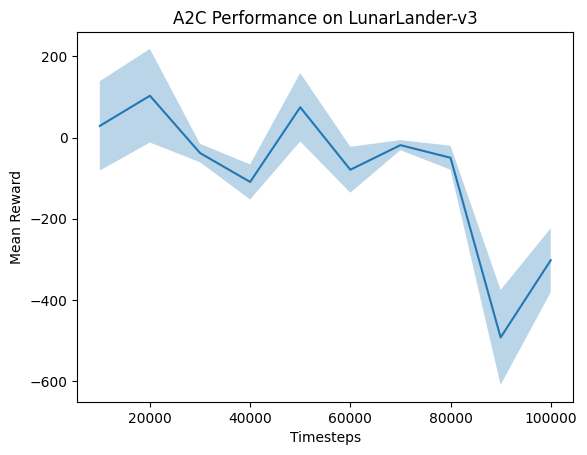

In [10]:
data = np.load("evaluations.npz")

# Extract the relevant data
timesteps = data['timesteps']
results = data['results']

# Calculate the mean and standard deviation of the results
mean_results = np.mean(results, axis=1)
std_results = np.std(results, axis=1)

# Plot the results
plt.figure()
plt.plot(timesteps, mean_results)
plt.fill_between(timesteps, mean_results - std_results, mean_results + std_results, alpha=0.3)

plt.xlabel('Timesteps')
plt.ylabel('Mean Reward')
plt.title('A2C Performance on LunarLander-v3')
plt.show()

Reward Analysis:
1. Initial Improvement (0–20,000 Timesteps): The agent starts with negative rewards but shows steady improvement, reaching rewards close to 200 as it learns basic strategies.
2. Mid-Training Variance (20,000–60,000 Timesteps):Rewards fluctuate as the agent refines its policy, with increased variability due to exploration and updates.
3. Performance Drop (80,000–90,000 Timesteps): A sharp decline occurs, likely due to training instability or suboptimal updates, with high variability in performance.
4. Recovery (90,000–100,000 Timesteps): The agent recovers and shows improvement, but performance remains unstable, indicating the need for further training or fine-tuning.


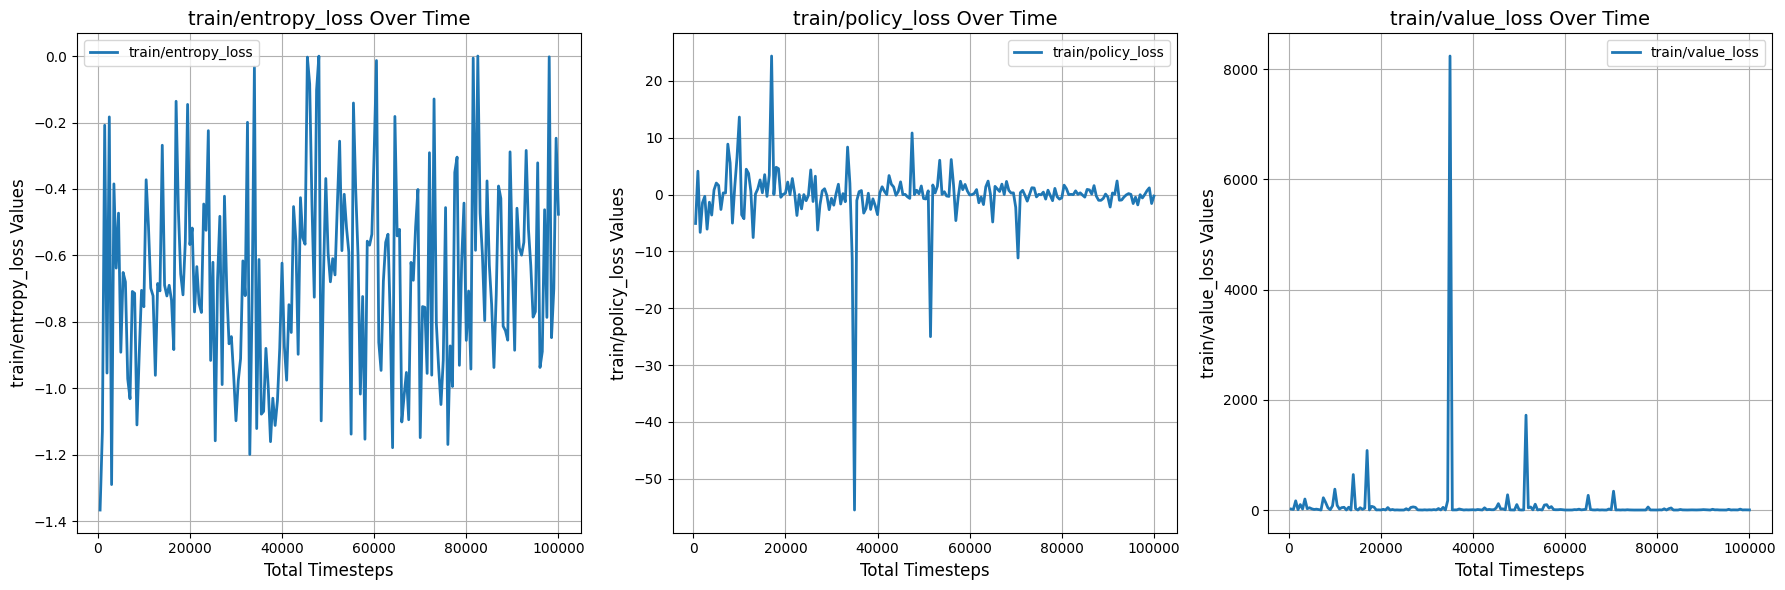

In [21]:
# Load the JSON file line by line
import os
import json
import matplotlib.pyplot as plt

# Path to the JSON file in the current directory
file_path = "progress.json"

# Read the JSON file line by line into a list of dictionaries
data = []
with open(file_path, 'r') as file:
    for line in file:
        data.append(json.loads(line.strip()))

# Specify the loss keys of interest
loss_keys = [
    'train/entropy_loss',
    'train/policy_loss',
    'train/value_loss'
]

# Filter entries that contain the required keys
filtered_data = [entry for entry in data if all(key in entry for key in loss_keys)]

# Extract timesteps and loss values for the specified keys
timesteps = [entry['time/total_timesteps'] for entry in filtered_data]
loss_data = {key: [entry[key] for entry in filtered_data] for key in loss_keys}

# Create subplots for side-by-side visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns of plots

# Plot each loss metric in a separate subplot
for i, loss_key in enumerate(loss_keys):
    axes[i].plot(timesteps, loss_data[loss_key], label=loss_key, linewidth=2)
    axes[i].set_xlabel('Total Timesteps', fontsize=12)
    axes[i].set_ylabel(f'{loss_key} Values', fontsize=12)
    axes[i].set_title(f'{loss_key} Over Time', fontsize=14)
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


Loss Analysis:
1. Entropy Loss
The entropy loss fluctuates significantly, indicating the policy is still exploring.
While some fluctuation is expected early on, continued instability suggests the agent hasn't fully converged to a deterministic policy.
It indicates an insufficient training period or suboptimal hyperparameters.

2. Policy Loss
Sharp drops around 40,000 timesteps suggest sudden updates caused by large gradients or reward changes.
The loss stabilizes toward the end, indicating the policy is improving and exploration is decreasing.

3. Value Loss
Large spikes, particularly around 40,000 timesteps, indicate difficulties in predicting returns for some states.
The value loss decreases over time, showing the value network has improved its estimation of expected rewards.
